### SNKL with perplexity

In [44]:
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from umap import UMAP
import tqdm
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

import zadu 
import zadu.measures
import zadu.measures.neighborhood_hit

import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
from metrics import _get_Q

In [45]:
np.random.seed(42)

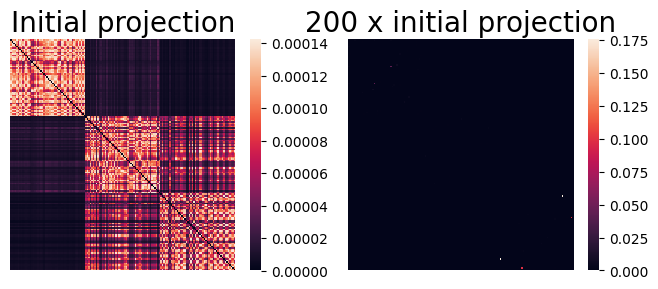

In [46]:


fig, (ax1,ax2) = plt.subplots(1,2,figsize=(8,3))

X,labels = load_iris(return_X_y=True,as_frame=False)

Y = PCA(n_components=2).fit_transform(X)


Q = _get_Q(Y)
sns.heatmap(Q,ax=ax1)

Q2 = _get_Q(200 * Y)
sns.heatmap(Q2,ax=ax2)

ax1.set_xticks([])
ax2.set_xticks([])
ax1.set_yticks([])
ax2.set_yticks([])        
ax1.set_title("Initial projection")
ax2.set_title("200 x initial projection")
fig.savefig("figures/heatmap.png")


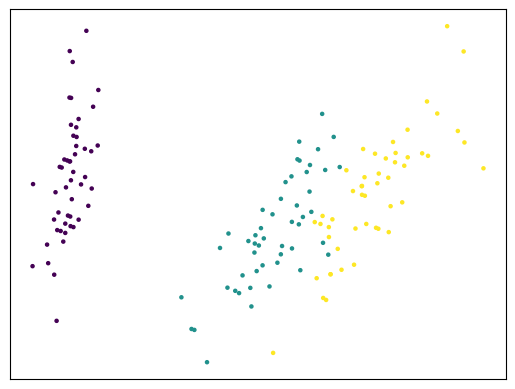

In [47]:
fig, ax = plt.subplots()
ax.scatter(Y[:,0], Y[:,1],s=5,c=labels)
ax.set_xticks([])
ax.set_yticks([])

fig.savefig("figures/fashion-pcainit.png")

In [48]:
import matplotlib as mpl

mpl.rcParams.update({
    'font.size': 22,             # Global font size
    'axes.titlesize': 20,        # Axes title
    'axes.labelsize': 20,        # Axes labels
    'xtick.labelsize': 10,       # X tick labels
    'ytick.labelsize': 10,       # Y tick labels
    'legend.fontsize': 10,       # Legend
    'figure.titlesize': 24       # Figure title
})

def draw_scatter(ax,Z,y,s=5):
    ax.scatter(Z[:,0],Z[:,1],c=y,alpha=0.7,s=s)
    ax.set_xticks([])
    ax.set_yticks([])

# fashion data

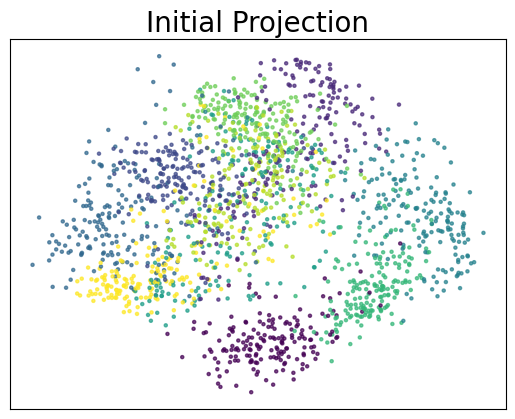

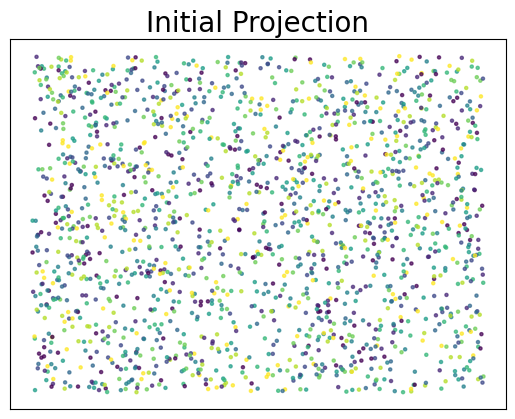

In [49]:
from sklearn.datasets import load_digits

X,y = load_digits(return_X_y=True)


initpca = PCA(2).fit_transform(X)
initrandom = np.random.uniform(-1,1,(X.shape[0],2))


fig, ax = plt.subplots()

draw_scatter(ax,initpca,y)

ax.set_title("Initial Projection")

fig.savefig("figures/mnist_init_pca.png")


fig, ax = plt.subplots()

draw_scatter(ax,initrandom,y)

ax.set_title("Initial Projection")

fig.savefig("figures/mnist_init_random.png")

mnist_pca = initpca
mnist_random = initrandom
mnist_x = X
mnist_y = y

# Fashion MNIST

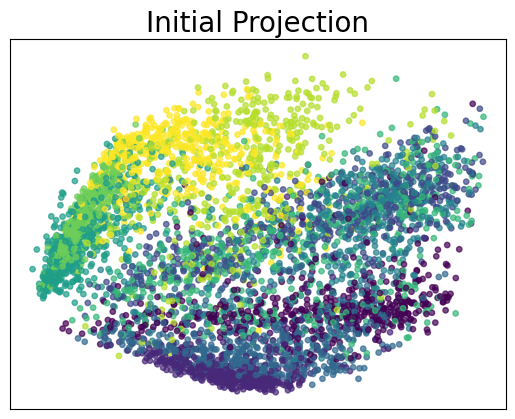

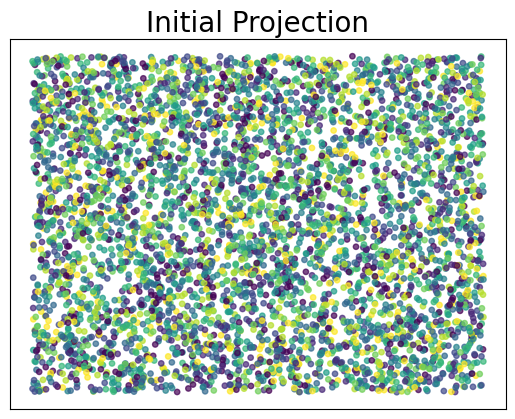

In [50]:
from sklearn.datasets import fetch_openml

X, y = fetch_openml('Fashion-MNIST', version=1, return_X_y=True, as_frame=False)

argchoice = np.random.choice(X.shape[0],size=5000,replace=False)
X = X[argchoice]
y = y[argchoice]

y  = [int(d) for d in y]


initpca = PCA(2).fit_transform(X)
initrandom = np.random.uniform(-1,1,(X.shape[0],2))


fig, ax = plt.subplots()

draw_scatter(ax,initpca,y,s=15)

ax.set_title("Initial Projection")

fig.savefig("figures/fashion_init_pca.png")


fig, ax = plt.subplots()

draw_scatter(ax,initrandom,y,15)

ax.set_title("Initial Projection")

fig.savefig("figures/fashion_init_random.png")

fashion_pca = initpca
fashion_random = initrandom
fashion_x = X
fashion_y = y

# Coil-20

(5000, 3)


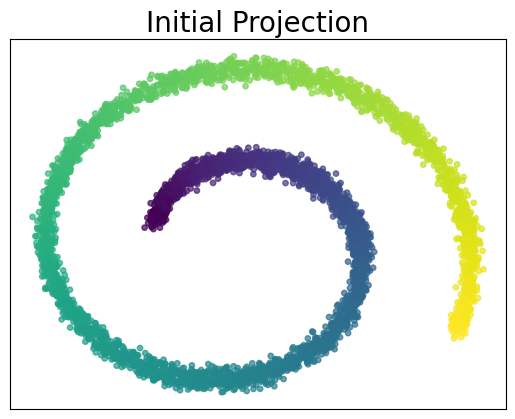

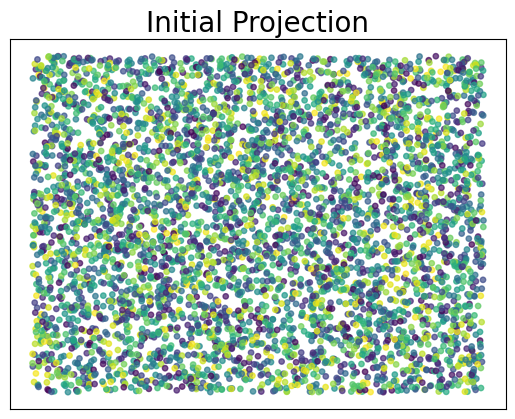

In [51]:
from sklearn.datasets import make_swiss_roll

X, y = make_swiss_roll(n_samples=5000, noise=0.25)
print(X.shape)


initpca = PCA(2).fit_transform(X)
initrandom = np.random.uniform(-1,1,(X.shape[0],2))


fig, ax = plt.subplots()

draw_scatter(ax,initpca,y,s=15)

ax.set_title("Initial Projection")

fig.savefig("figures/coil_init_pca.png")


fig, ax = plt.subplots()

draw_scatter(ax,initrandom,y,15)

ax.set_title("Initial Projection")

fig.savefig("figures/coil_init_random.png")

coil_pca = initpca
coil_random = initrandom
coil_x = X
coil_y = y

In [52]:
def tsne_short(X,y,rrange,init,outname):
    nplots = 4
    fig_width = 3 * nplots
    fig_height = 4

    fig,axes = plt.subplots(1,len(rrange),figsize=(fig_width,fig_height))

    for alpha,ax in tqdm.tqdm(zip(rrange,axes)):
        Z = TSNE(init=alpha * init).fit_transform(X)
        draw_scatter(ax,Z,y,s=5)
        ax.set_title(f"init x {alpha}")

    plt.tight_layout()
    fig.savefig(f"figures/tsne_{outname}.png")



In [53]:
def umap_short(X,y,rrange,init,outname):
    nplots = 4
    fig_width = 3 * nplots
    fig_height = 4
    fig,axes = plt.subplots(1,len(rrange),figsize=(fig_width,fig_height))

    for alpha,ax in tqdm.tqdm(zip(rrange,axes)):
        Z = UMAP(init=alpha * init).fit_transform(X)
        draw_scatter(ax,Z,y,s=5)
        ax.set_title(f"init x {alpha}")

    plt.tight_layout()
    fig.savefig(f"figures/umap_{outname}.png")

In [54]:
def tsne_full(X,y,rrange,init):
    vals = list()
    for alpha in tqdm.tqdm(rrange):
        Z = TSNE(init=alpha * init).fit_transform(X)
        vals.append(zadu.measures.neighborhood_hit.measure(Z,y)['neighborhood_hit'])
    return vals

In [55]:
def umap_full(X,y,rrange,init):
    vals2 = list()
    for alpha in tqdm.tqdm(rrange):
        Z = UMAP(init=alpha * init).fit_transform(X)
        vals2.append(zadu.measures.neighborhood_hit.measure(Z,y)['neighborhood_hit'])
    return vals2

In [56]:
def curves(vals,vals2,rrange,outname):
    fig,ax = plt.subplots(figsize=(8,3))

    ax.plot(rrange,vals,label='t-SNE')
    ax.plot(rrange,vals2,label='UMAP')
    ax.set_xscale("log")
    ax.set_xlabel("Scale of initial projection (PCA)")
    ax.set_ylabel("NH")
    ax.legend()
    plt.tight_layout()
    fig.savefig(f"figures/curves-{outname}.pdf")

0it [00:00, ?it/s]

4it [00:12,  3.16s/it]
4it [00:06,  1.67s/it]
100%|██████████| 50/50 [01:27<00:00,  1.75s/it]


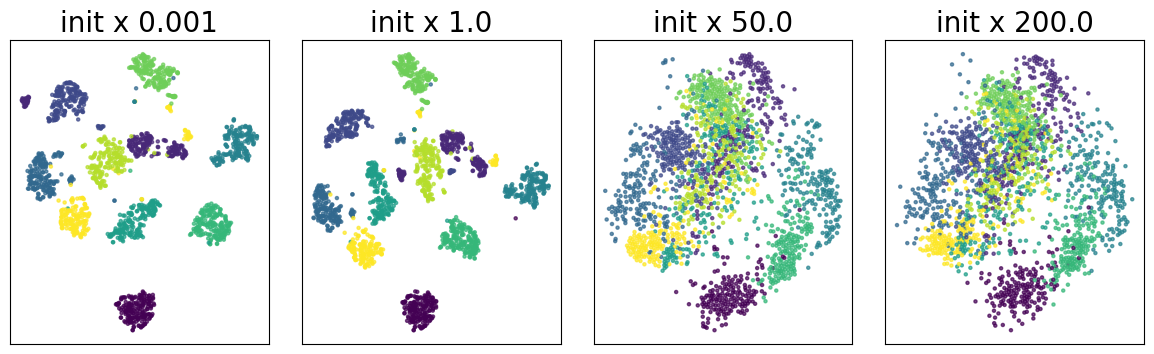

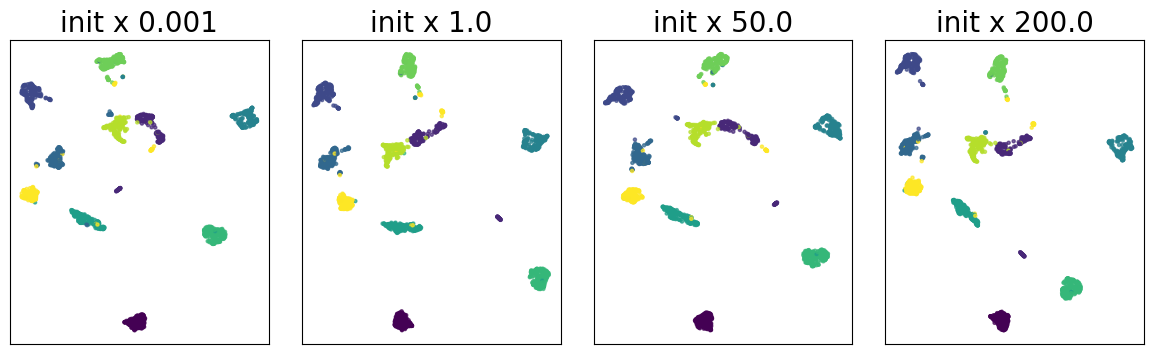

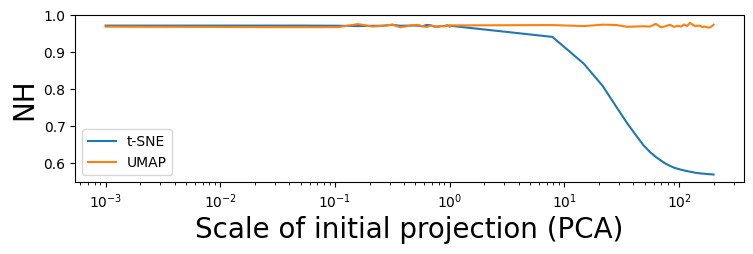

In [57]:
init = mnist_pca 
outname = "mnist_pca"
X = mnist_x
y = mnist_y

rrange = [0.001, 1.0, 50.0, 200.0]
tsne_short(X,y,rrange,init,outname)
umap_short(X,y,rrange,init,outname)

rrange = np.concat([np.linspace(0.001,1,20), np.linspace(1,200,30)])
v1 = tsne_full(X,y,rrange,init)
v2 = umap_full(X,y,rrange,init)
curves(v1,v2,rrange,outname)


4it [00:14,  3.57s/it]
4it [00:06,  1.66s/it]
100%|██████████| 50/50 [01:22<00:00,  1.64s/it]


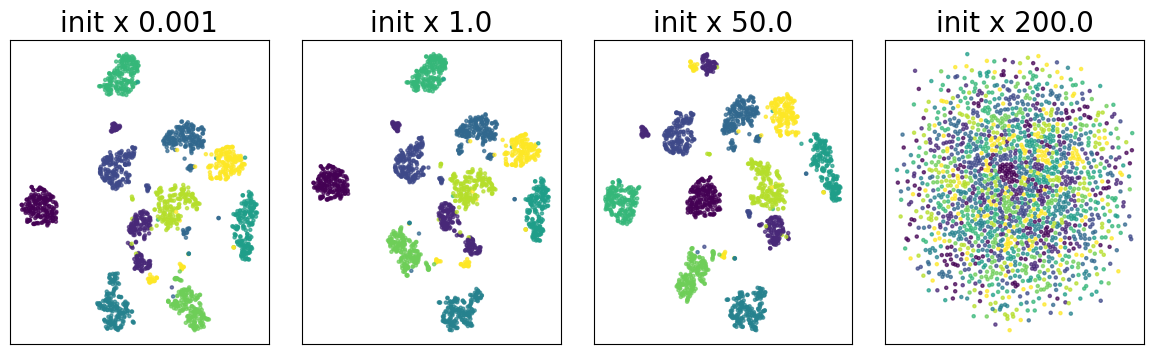

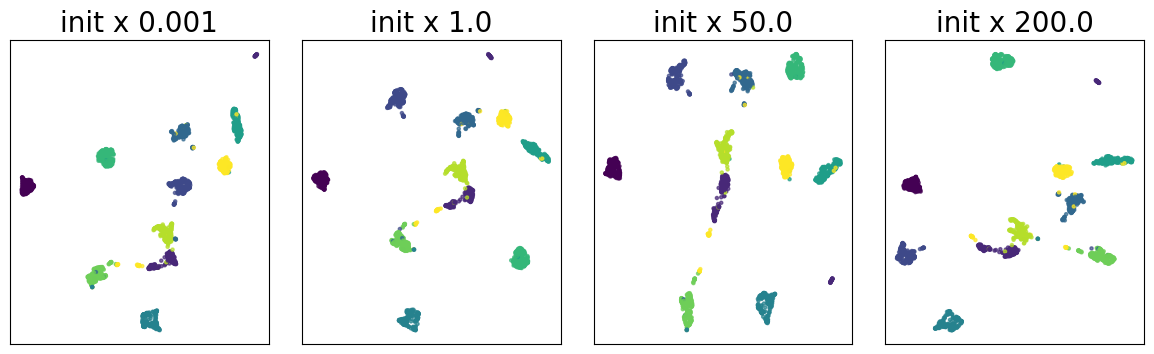

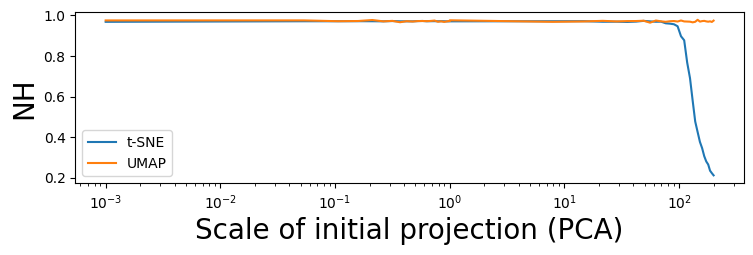

In [58]:
init = mnist_random 
outname = "mnist_random"
X = mnist_x
y = mnist_y

rrange = [0.001, 1.0, 50.0, 200.0]
tsne_short(X,y,rrange,init,outname)
umap_short(X,y,rrange,init,outname)

rrange = np.concat([np.linspace(0.001,1,20), np.linspace(1,200,30)])
v1 = tsne_full(X,y,rrange,init)
v2 = umap_full(X,y,rrange,init)
curves(v1,v2,rrange,outname)


4it [00:43, 10.95s/it]
4it [00:05,  1.48s/it]
100%|██████████| 50/50 [01:16<00:00,  1.53s/it]


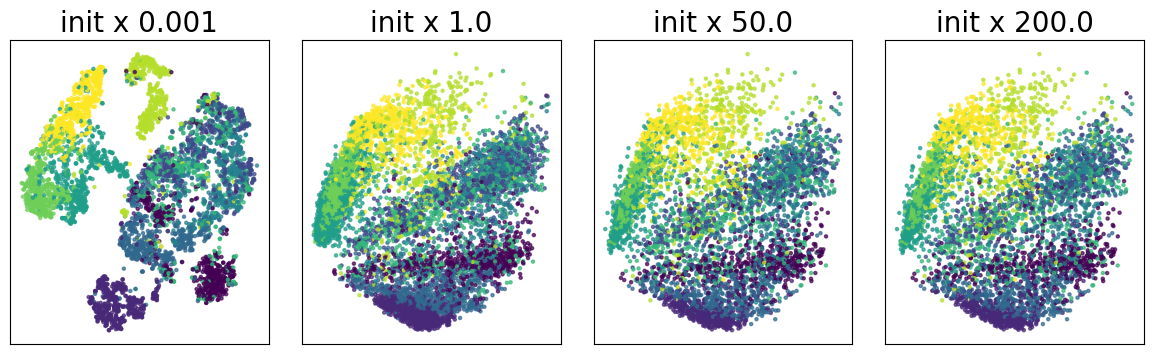

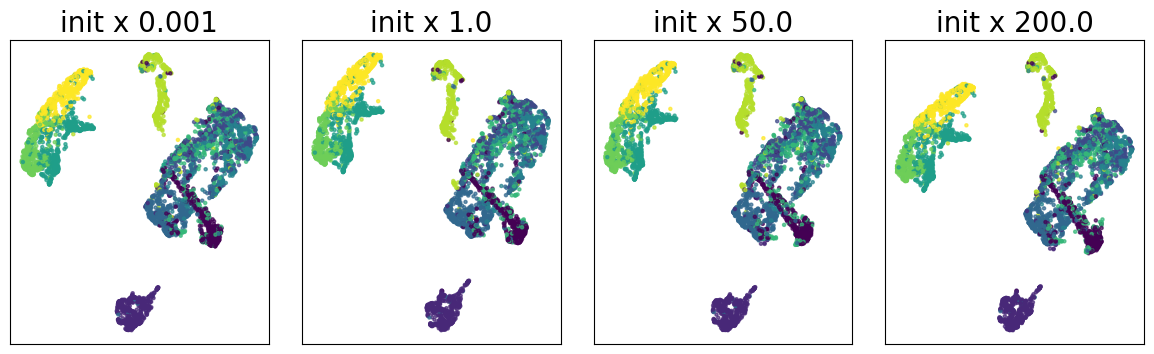

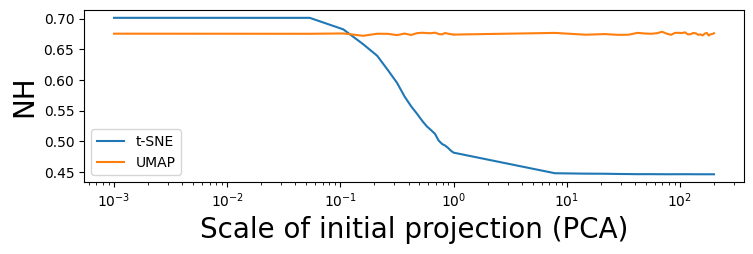

In [60]:
init = fashion_pca 
outname = "fashion_pca"
X = fashion_x
y = np.array(fashion_y)

rrange = [0.001, 1.0, 50.0, 200.0]
tsne_short(X,y,rrange,init,outname)
umap_short(X,y,rrange,init,outname)

rrange = np.concat([np.linspace(0.001,1,20), np.linspace(1,200,30)])
v1 = tsne_full(X,y,rrange,init)
v2 = umap_full(X,y,rrange,init)
curves(v1,v2,rrange,outname)


4it [00:01,  3.59it/s]
4it [00:00,  8.42it/s]
100%|██████████| 50/50 [00:06<00:00,  8.33it/s]


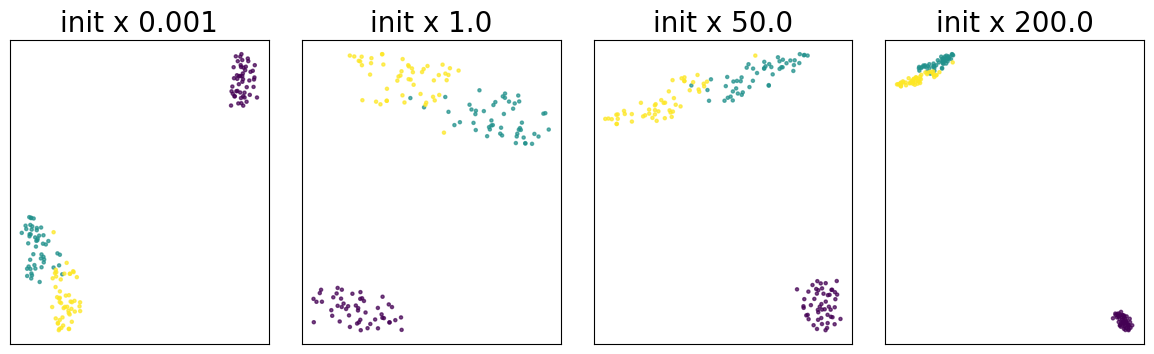

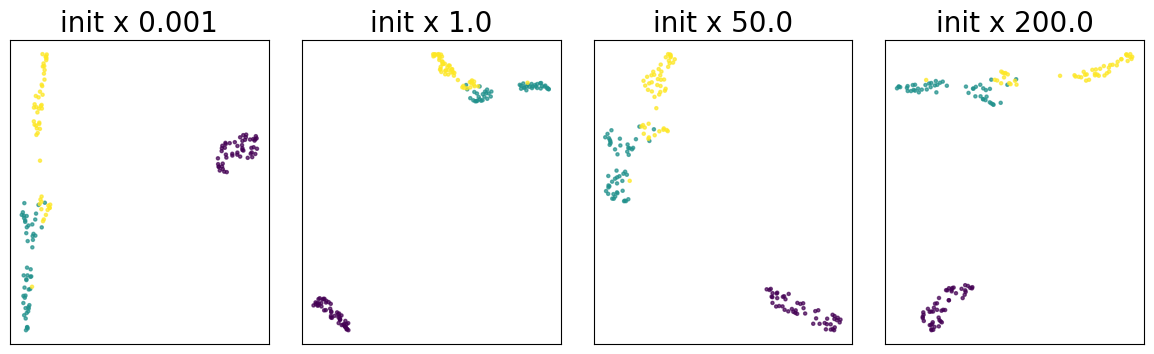

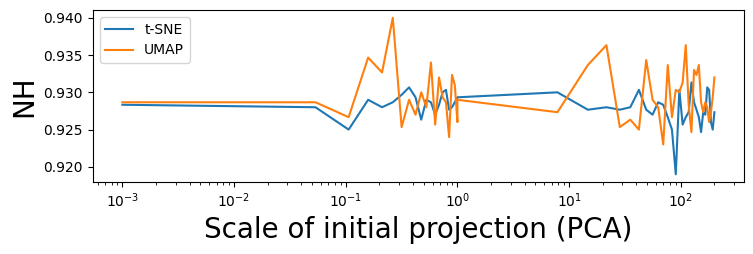

In [ ]:
init = fashion_random 
outname = "fashion_random"
X = fashion_x
y = np.array(fashion_y)

rrange = [0.001, 1.0, 50.0, 200.0]
tsne_short(X,y,rrange,init,outname)
umap_short(X,y,rrange,init,outname)

rrange = np.concat([np.linspace(0.001,1,20), np.linspace(1,200,30)])
v1 = tsne_full(X,y,rrange,init)
v2 = umap_full(X,y,rrange,init)
curves(v1,v2,rrange,outname)


4it [00:01,  2.49it/s]
4it [00:00,  9.86it/s]
100%|██████████| 50/50 [00:06<00:00,  7.37it/s]


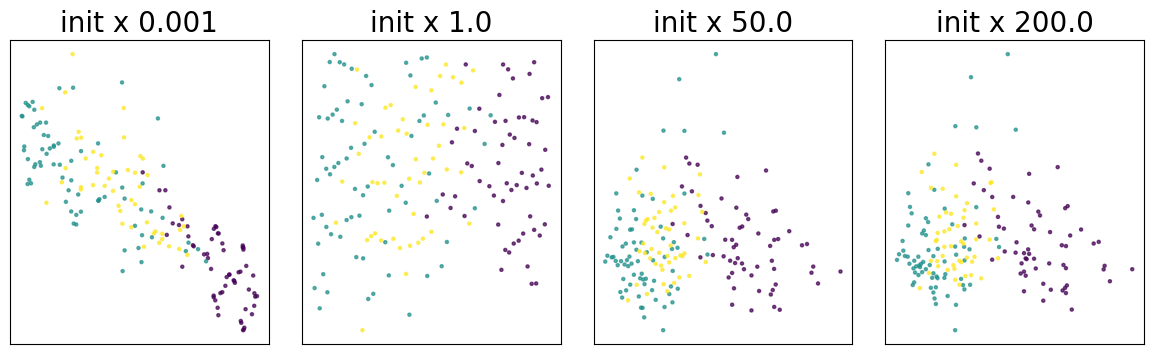

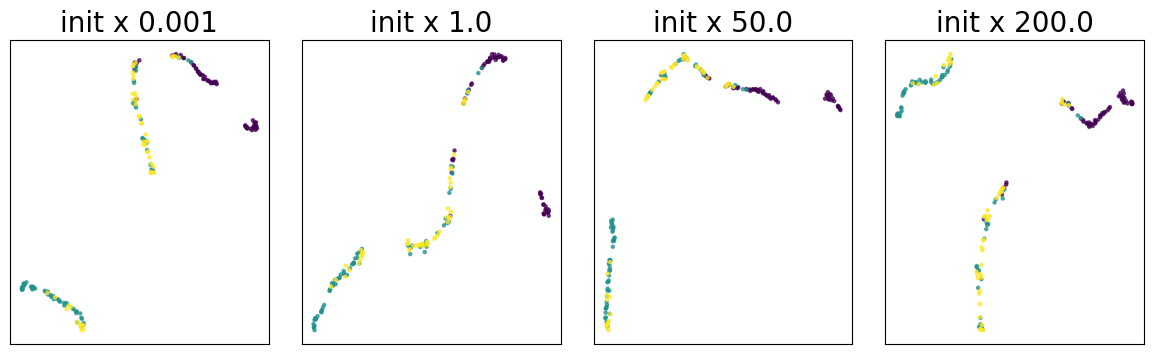

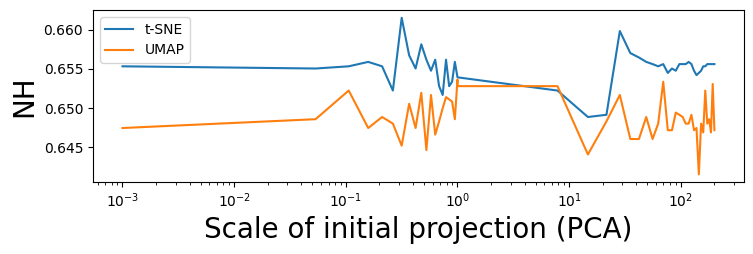

In [ ]:
init = coil_pca 
outname = "coil_pca"
X = coil_x
y = coil_y

rrange = [0.001, 1.0, 50.0, 200.0]
tsne_short(X,y,rrange,init,outname)
umap_short(X,y,rrange,init,outname)

rrange = np.concat([np.linspace(0.001,1,20), np.linspace(1,200,30)])
v1 = tsne_full(X,y,rrange,init)
v2 = umap_full(X,y,rrange,init)
curves(v1,v2,rrange,outname)


4it [00:01,  3.45it/s]
4it [00:00,  8.88it/s]
100%|██████████| 50/50 [00:06<00:00,  8.31it/s]


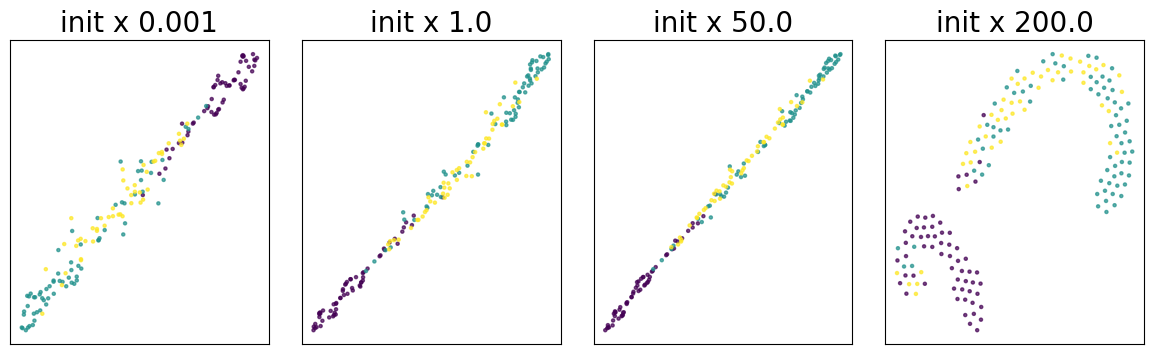

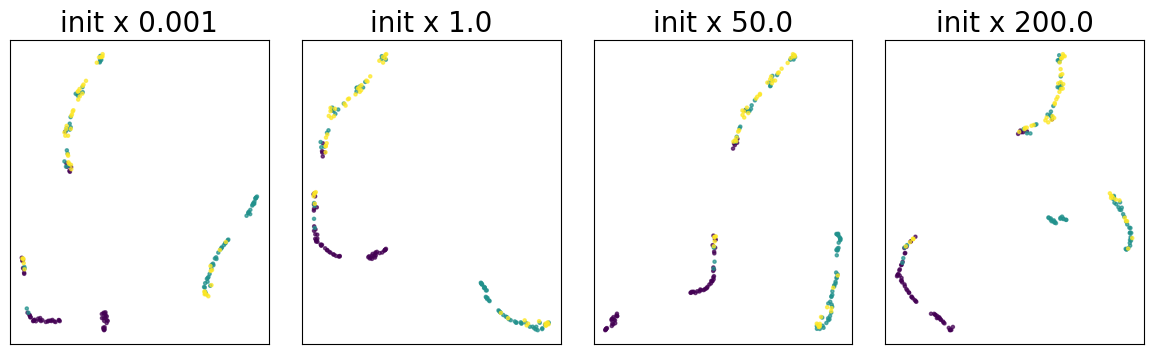

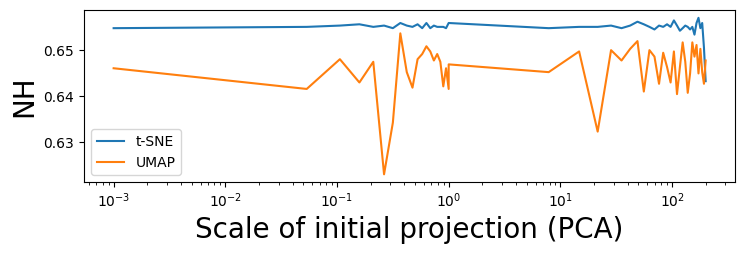

In [ ]:
init = coil_random 
outname = "coil_random"
X = coil_x
y = coil_y

rrange = [0.001, 1.0, 50.0, 200.0]
tsne_short(X,y,rrange,init,outname)
umap_short(X,y,rrange,init,outname)

rrange = np.concat([np.linspace(0.001,1,20), np.linspace(1,200,30)])
v1 = tsne_full(X,y,rrange,init)
v2 = umap_full(X,y,rrange,init)
curves(v1,v2,rrange,outname)
